In [39]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [2]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/Monster_job.csv",engine='python',encoding='utf-8')

In [41]:
df.head(5)

,Unnamed: 0,job_Role,company,location,experience,description
0,0,Business Associate,Etiqu,Madurai,0-1 Years,Not Specified
1,1,Immediate Opening for Hardware and Networking ...,Sysco Infotech,Chennai,0-2 Years,Not Specified
2,2,Walk In for HDFC Life/ Banca Vertical/ Malegao...,Hr Remedy India,Mumbai,1-10 Years,Not Specified
3,3,freshers Telesales Executive Telecaller Intern...,Tremplin Solutions Private Limited,Bengaluru / Bangalore,0-5 Years,Not Specified
4,4,Mega Walk in-drive for Voice Process BPO – Day...,Allsec Technologies,Chennai,0-1 Years,Not Specified


In [42]:
df = df.drop(columns=['Unnamed: 0'])

In [43]:
df.columns

Index(['job_Role', 'company', 'location', 'experience', 'description'], dtype='object')

In [44]:
df.isnull().sum()

job_Role       0
company        0
location       0
experience     0
description    0
dtype: int64

In [45]:
df.shape

(125, 5)

In [46]:
job_Role = df['job_Role'].dropna()

In [47]:
job_Role = job_Role.tolist() 

In [48]:
print(job_Role[0])

Business Associate


In [49]:
print(len(job_Role))

125


In [50]:
def findJobCntonSkill(skill):
    requiredSkill = []
    for i in job_Role:
        if(skill in i):
            requiredSkill.append(i)
    return(len(requiredSkill))  

In [51]:
findJobCntonSkill("Design")

10

In [52]:
top5JobSkills = df['job_Role'].value_counts()
top5JobSkills[0:5]

Walk-in Drive- Xavient – Automation Testing (Selenium) - Saturday (13-July-19)                       5
Immediate Opening for Hardware and Networking Engineers (Freshers)                                   5
Hiring for HR-Recruiters at Skyscraper Consulting ! Pckg- 13-18K+ Bonus + Incentives | 8237076800    5
Walk In for HDFC Life/ Banca Vertical/ Malegaon @ 8087075486                                         5
Walk IN For GENERAL EMBEDDED on July 13, 2019 at Chennai                                             5
Name: job_Role, dtype: int64

In [53]:
top10company = df['company'].value_counts()
top10company[0:10]

Jasmin Infotech Private Limited               20
Hucon Solutions India Private Limited         10
Free Lancer S Divya                           10
Sky Scrapper Consulting                       10
Mphasis Limited                               10
Cameo Global Communication Private Limited     5
Etiqu                                          5
Rahat Enterprises                              5
Tremplin Solutions Private Limited             5
Sysco Infotech                                 5
Name: company, dtype: int64

In [54]:
top10job_Role = df['job_Role'].value_counts()
top10job_Role[0:10]

Walk-in Drive- Xavient – Automation Testing (Selenium) - Saturday (13-July-19)                       5
Immediate Opening for Hardware and Networking Engineers (Freshers)                                   5
Hiring for HR-Recruiters at Skyscraper Consulting ! Pckg- 13-18K+ Bonus + Incentives | 8237076800    5
Walk In for HDFC Life/ Banca Vertical/ Malegaon @ 8087075486                                         5
Walk IN For GENERAL EMBEDDED on July 13, 2019 at Chennai                                             5
Walk-in @ STG Infotech for Java/J2ee Professionals on 13th July 2019(Saturday)                       5
Urgently required Manpower for below positions for Qatar, direct interviews in Trichy, Tamilnadu     5
Walk IN For Autosar on July 13, 2019 at Chennai                                                      5
Immediate Opening for IT ANALYST in Cameo Global Communication pvt ltd                               5
Walk IN For CAN on July 13, 2019 at Chennai                              

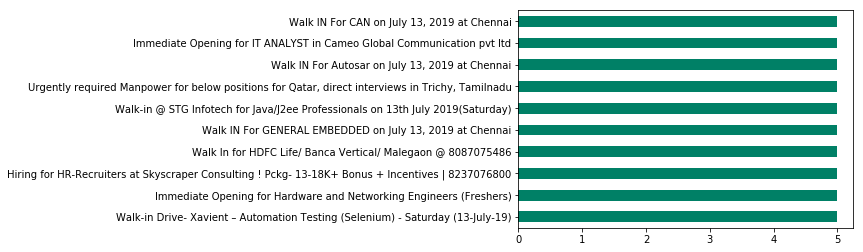

In [55]:
df['job_Role'].value_counts()[:10].plot(kind='barh',colormap='summer')

In [56]:
top5Company = df['company'].value_counts()
top5Company = top5Company[0:5]
print(type(top5Company))

<class 'pandas.core.series.Series'>


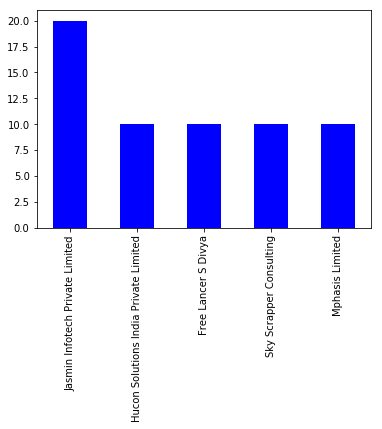

In [57]:
top5Company.plot.bar(stacked=True, colormap='winter')

In [58]:
top5ExperienceLevel = df['experience'].value_counts()
top5ExperienceLevel[0:5]

3-8 Years    25
0-3 Years    10
0-1 Years    10
0-2 Years    10
0-4 Years    10
Name: experience, dtype: int64

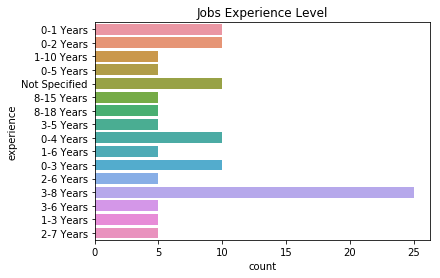

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="experience", data=df)
plt.title("Jobs Experience Level")

plt.show()

In [60]:
diffJobCategories= df['job_Role'].dropna()

In [61]:
diffJobCategories.value_counts()

Walk-in Drive- Xavient – Automation Testing (Selenium) - Saturday (13-July-19)                               5
Immediate Opening for Hardware and Networking Engineers (Freshers)                                           5
Hiring for HR-Recruiters at Skyscraper Consulting ! Pckg- 13-18K+ Bonus + Incentives | 8237076800            5
Walk In for HDFC Life/ Banca Vertical/ Malegaon @ 8087075486                                                 5
Walk IN For GENERAL EMBEDDED on July 13, 2019 at Chennai                                                     5
Walk-in @ STG Infotech for Java/J2ee Professionals on 13th July 2019(Saturday)                               5
Urgently required Manpower for below positions for Qatar, direct interviews in Trichy, Tamilnadu             5
Walk IN For Autosar on July 13, 2019 at Chennai                                                              5
Immediate Opening for IT ANALYST in Cameo Global Communication pvt ltd                                       5
W

In [62]:
dfJobLocation = df['location'].value_counts()
dfJobLocation = dfJobLocation[0:10]

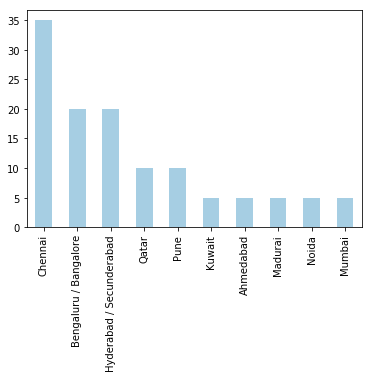

In [63]:
dfJobLocation.plot.bar(stacked=True, colormap='Paired')

In [64]:
#by_product_cat_subcat = df.groupby(['location'])
#by_product_cat_subcat

#df_Chennai = df['location'].groupby(df['job_Role'])

In [65]:

df_skill_loc = df.loc[df['location'] == 'City of Chennai, Chennai']
df_skill_loc['job_Role'].value_counts(2)

Series([], Name: job_Role, dtype: float64)

In [66]:
dfcomp = df_skill_loc['company'].value_counts()
dfcomp[0:5]

Series([], Name: company, dtype: int64)

In [67]:
jobRole = df['job_Role'].value_counts()
jobRole[0:5]

Walk-in Drive- Xavient – Automation Testing (Selenium) - Saturday (13-July-19)                       5
Immediate Opening for Hardware and Networking Engineers (Freshers)                                   5
Hiring for HR-Recruiters at Skyscraper Consulting ! Pckg- 13-18K+ Bonus + Incentives | 8237076800    5
Walk In for HDFC Life/ Banca Vertical/ Malegaon @ 8087075486                                         5
Walk IN For GENERAL EMBEDDED on July 13, 2019 at Chennai                                             5
Name: job_Role, dtype: int64

# Analysis of job_Role Data

In [68]:
job_Role = df['job_Role'].dropna()

In [69]:
#job_Role = job_Role.tolist() 

# Pre Processing Steps

In [70]:
# Prepare Stop Words
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [71]:
#Tokenize words and Clean up Text

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(job_Role))

print(data_words[:1])

[['business', 'associate']]


In [72]:
#Creating Bigram and Trigram models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['business', 'associate']


In [73]:
#Remove Stop words , Make Bigrams and Lemmatize
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [74]:
# Calling functions

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['business', 'associate'], ['hardware', 'engineer', 'fresher'], ['life', 'malegaon'], ['fresher', 'telesale', 'telecaller', 'sale', 'call', 'center', 'voice']]


In [75]:
# Create Dictionary and Corpus needed for Topic Modelling

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [76]:
id2word[0]

'associate'

In [77]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('associate', 1), ('business', 1)],
 [('engineer', 1), ('fresher', 1), ('hardware', 1)],
 [('life', 1), ('malegaon', 1)]]

# Building LDA Model

In [78]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [79]:
# View the topics in LDA Model
# Print the Keywords in the Top 10 Topics

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.129*"process" + 0.129*"voice" + 0.086*"shift" + 0.086*"bpo" + '
  '0.086*"drive" + 0.044*"insurance" + 0.044*"sun" + 0.044*"inc" + 0.044*"fix" '
  '+ 0.044*"day"'),
 (1,
  '0.094*"engineer" + 0.048*"july" + 0.048*"phone" + 0.048*"site" + '
  '0.048*"vacancy" + 0.048*"officer" + 0.048*"banking" + 0.048*"malegaon" + '
  '0.048*"design" + 0.048*"life"'),
 (2,
  '0.103*"chennai" + 0.069*"position" + 0.069*"interview" + 0.069*"sale" + '
  '0.069*"manpower" + 0.035*"voice" + 0.035*"fresher" + 0.035*"drive" + '
  '0.035*"mnc" + 0.035*"call"'),
 (3,
  '0.148*"july" + 0.050*"bonus" + 0.050*"recruiter" + 0.050*"skyscraper" + '
  '0.050*"incentive" + 0.050*"business" + 0.050*"associate" + 0.050*"walkin" + '
  '0.050*"infotech" + 0.050*"market"'),
 (4,
  '0.098*"cameo" + 0.098*"pvt" + 0.098*"ltd" + 0.098*"communication" + '
  '0.098*"analyst" + 0.098*"hardware" + 0.098*"fresher" + 0.098*"engineer" + '
  '0.004*"recruitment" + 0.004*"delhi"')]


In [80]:
# Compute Model Perplexity and Coherence Score

In [81]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.828097834510188

Coherence Score:  0.5666510872564524


# Hyperparameter Tuning - Alpha and No. of Topics

In [83]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [84]:
# build models across a range of num_topics and alpha
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [85]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.598216
1,0.010,6,0.559469
2,0.010,10,0.551823
3,0.010,15,0.572557
4,0.010,20,0.580434
5,0.100,2,0.528052
6,0.100,6,0.530388
7,0.100,10,0.582655
8,0.100,15,0.586946
9,0.100,20,0.614171


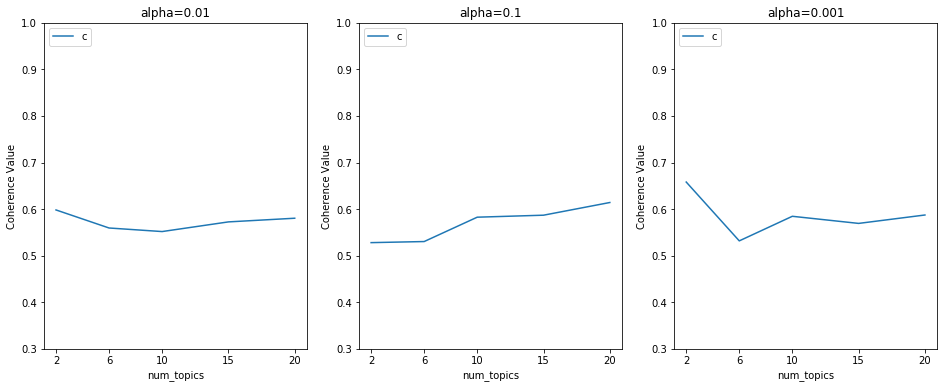

In [86]:
# plot
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [102]:
# Build LDA model with alpha=0.01 and 10 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.001,
                                           per_word_topics=True)

In [103]:
# print keywords 
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.099*"voice" + 0.099*"process" + 0.099*"bpo" + 0.099*"shift" + '
  '0.099*"insurance" + 0.099*"inc" + 0.099*"call" + 0.099*"sun" + 0.099*"fix" '
  '+ 0.002*"chennai"'),
 (1,
  '0.123*"engineer" + 0.123*"drive" + 0.123*"design" + 0.123*"walkin" + '
  '0.123*"capital" + 0.123*"july" + 0.123*"market" + 0.002*"life" + '
  '0.002*"malegaon" + 0.002*"vacancy"'),
 (2,
  '0.142*"chennai" + 0.095*"sale" + 0.048*"autosar" + 0.048*"telesale" + '
  '0.048*"service" + 0.048*"mnc" + 0.048*"customer" + 0.048*"july" + '
  '0.048*"drive" + 0.048*"voice"'),
 (3,
  '0.083*"drive" + 0.083*"recruiter" + 0.083*"mnc" + 0.083*"skyscraper" + '
  '0.083*"business" + 0.083*"incentive" + 0.083*"bonus" + 0.083*"associate" + '
  '0.083*"fresher" + 0.083*"chennai"'),
 (4,
  '0.110*"engineer" + 0.110*"fresher" + 0.110*"hardware" + 0.110*"analyst" + '
  '0.110*"ltd" + 0.110*"communication" + 0.110*"cameo" + 0.110*"pvt" + '
  '0.002*"position" + 0.002*"interview"'),
 (5,
  '0.162*"malegaon" + 0.162*"vacancy" +

In [104]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.6465185791093817

Coherence Score:  0.5781843593703985


In [105]:
coherence_model_lda.get_coherence_per_topic()

[0.4603800685302685,
 0.6582252886381739,
 0.4597665317887869,
 0.6647962584712344,
 0.6137747914563432,
 0.5773860043287146,
 0.6021446380828241,
 0.5394417991948555,
 0.5757578613308489,
 0.6301703518819349]